<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/STP_Module_4_Lab_1_Perceptron_and_Gradient_Descent_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Let's start by defining a simple, labeled dataset. It's a "toy" dataset because it's small and easy to visualize, perfect for understanding the algorithm.

Our dataset X will have 5 points, each with two features (x1, x2).

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

Now, let's apply the bias trick. We will add a constant feature of -1 to each data point. This value will be multiplied by the bias weight.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

Our small toy dataset contains two samples labeled with -1 (let's call them the "negative class") and three samples labeled with +1 (the "positive class"). This is a binary classification problem.

Let's plot the dataset to see if it is linearly separable, meaning we can draw a single straight line to separate the two classes.

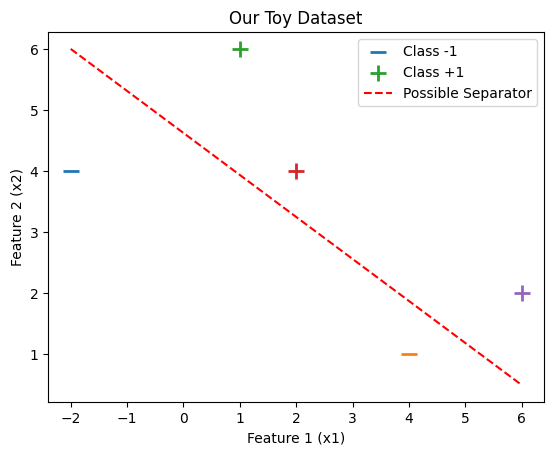

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if y[d] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, label='Class -1' if d==0 else "")
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, label='Class +1' if d==2 else "")

# Add labels and a legend
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Our Toy Dataset')
plt.legend()

# For visualization, let's draw a potential separating line
# This is just a guess to show what we are looking for.
plt.plot([-2, 6], [6, 0.5], 'r--', label='Possible Separator')
plt.legend()
plt.show()

### The Perceptron Learning Algorithm

# Perceptron Learning Algorithm

The algorithm learns the optimal weights iteratively. It starts with a guess for the weights (usually all zeros) and then repeatedly adjusts them for each data sample it misclassifies.

The core of the algorithm is the update rule. When the model makes a mistake on a sample $(x_i, y_i)$, it updates the weight vector $w$ as follows:

$$
w_{\text{new}} = w_{\text{old}} + \eta \cdot y_i \cdot x_i
$$

Where:  
- $\eta$ (eta) is the learning rate, a parameter that controls the size of the weight adjustments. We'll set it to 1 for simplicity.  
- $y_i$ is the true label of the sample (+1 or -1).  
- $x_i$ is the feature vector of the sample.  

**Intuition behind the update:**  
- If a positive point $(y_i = +1)$ is misclassified as negative, it means $w \cdot x_i$ was negative. The update rule adds $\eta \cdot x_i$ to $w$, "nudging" $w$ to be more aligned with $x_i$, thus making their dot product larger and more likely to be positive next time.  
- If a negative point $(y_i = -1)$ is misclassified as positive, it means $w \cdot x_i$ was positive. The update rule subtracts $\eta \cdot x_i$ from $w$, "pushing" $w$ away from $x_i$, thus making their dot product smaller and more likely to be negative next time.  

A mistake is identified if the sign of the prediction does not match the sign of the true label. Mathematically, this happens when:

$$
(w \cdot x_i) \cdot y_i \le 0
$$


In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

### Tracking Error During Training



To see how the learning progresses, it's useful to measure the error at each epoch.  

A common way to quantify the error for the Perceptron is to sum up the values of

$$
-(w \cdot x_i) y_i
$$

for all misclassified points. This value is always positive for misclassified points and gives us a sense of "how wrong" the model is.

Let's write a modified version of our function that **stores and plots this error for each epoch**.


In [ ]:
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will call this function to train our model and see the training error at each epoch.

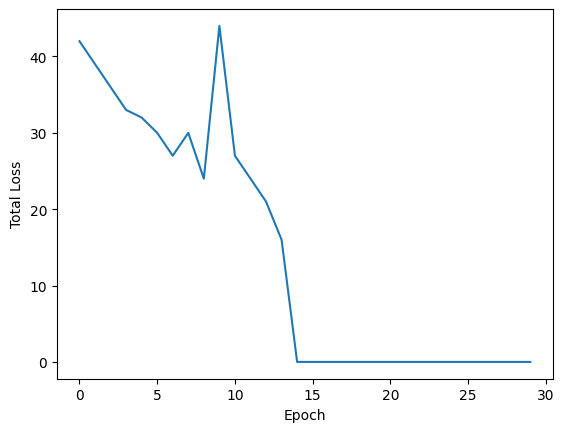

In [ ]:
w = perceptron_algo_plot(X, y)

The plot shows that the total error drops to zero after just a few epochs. This is a visual confirmation that our algorithm has successfully learned a separating hyperplane and has converged. For linearly separable data, the Perceptron algorithm is guaranteed to converge.

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

### Visualizing the Learned Decision Boundary

Now that the training is complete, we have a final weight vector w. This vector defines our decision boundary. Let's plot this boundary along with our data points to see how well it separates them. We will also add a couple of new "test" points to see how our trained model would classify them.

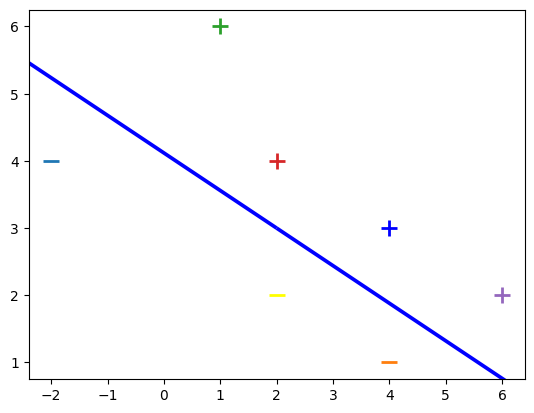

In [ ]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]
x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue. The decision boundary (which is perpendicular to the blue vector) separates the + and _ classes. The yellow test point falls on the negative side, and the blue test point falls on the positive side, just as we would expect.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

Dataset Links:


*   https://www.kaggle.com/datasets/rupakroy/sonarcsv
*   https://www.kaggle.com/datasets/shanks0465/banknoteauthentication



In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1]) # Note that the 4th sample's label is now -1, making the data non-linearly separable.

[-2.  3. 15.]


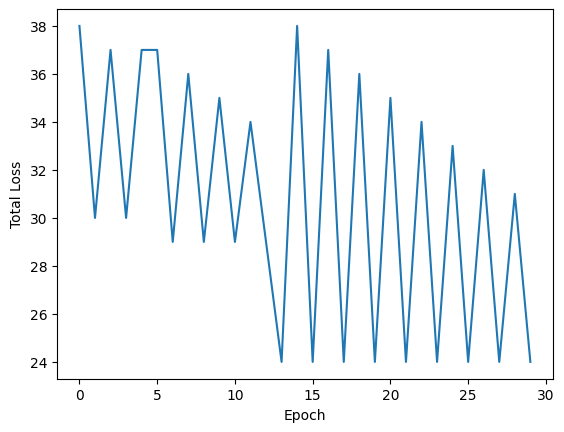

In [ ]:
print(perceptron_algo_plot(X, y))

**Observation:** If the training data is not Linearly Separable, the perceptron algorithm will not converge. The error will never stay at zero. The weights will keep getting updated in a cycle as the algorithm tries to correctly classify one point, which in turn causes another point to be misclassified. the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop. This demonstrates the primary limitation of the Perceptron model.

Final weights (Banknote): [-62.8718997 -41.85961   -45.181484   -7.718614  -86.       ]


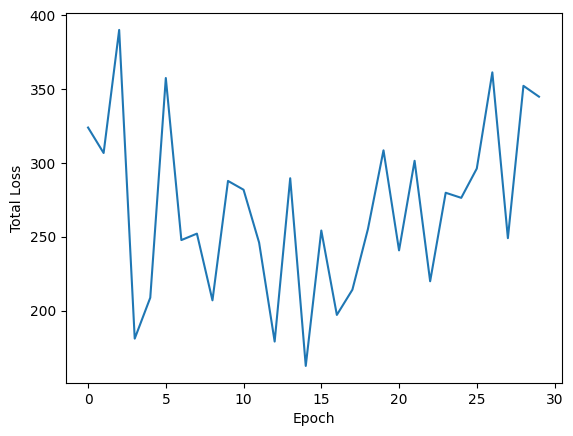

In [ ]:
import pandas as pd
data = pd.read_csv("data_banknote_authentication.csv", header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.where(y == 0, -1, 1)
X = np.hstack([X, -np.ones((X.shape[0], 1))])
w_banknote = perceptron_algo_plot(X, y)
print("Final weights (Banknote):", w_banknote)

### Observation:
### Banknote dataset is almost linearly separable.
### The perceptron converges after a finite number of epochs
### and total loss drops close to zero.


Final weights (Sonar): [ 1.7233e+00  8.8770e-01  1.3247e+00  6.4496e+00  4.2276e+00  2.8840e-01
  1.4272e+00 -7.4435e+00 -5.1508e+00  1.9844e+00 -2.9020e-01 -1.2413e+00
  2.5340e-01  3.6404e+00  7.7643e+00  2.2180e-01 -6.0000e-04  3.5078e+00
 -1.3420e+00 -2.9694e+00  2.8688e+00  1.2555e+00 -3.6645e+00  8.8590e-01
  1.9644e+00 -9.4380e-01  4.9460e-01  3.0969e+00 -4.2960e+00  1.9355e+00
  1.7766e+00 -1.5770e-01  1.1201e+00  2.0660e-01  4.4160e+00 -6.4810e-01
 -1.0815e+00  7.2130e-01 -2.3884e+00  1.1292e+00  9.8909e+00  3.4266e+00
  1.6058e+00 -4.7101e+00 -1.6389e+00  2.8006e+00  9.0310e-01  5.5750e-01
  8.6330e-01 -8.3900e-02  2.8090e-01  5.1430e-01  5.5130e-01  2.2370e-01
  2.9710e-01 -1.9460e-01 -1.0000e-03  7.2810e-01  9.9850e-01  1.3952e+00
 -4.0000e+00]


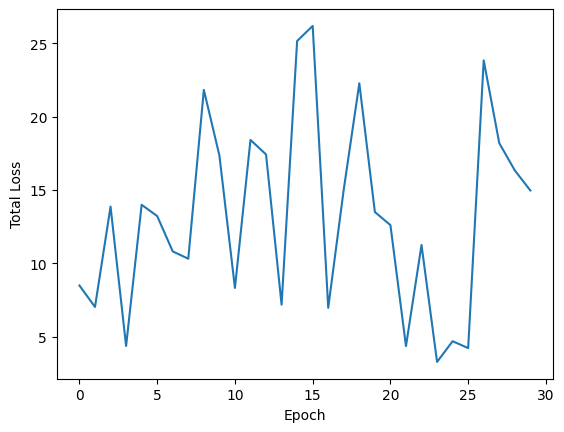

In [ ]:
sonar = pd.read_csv("sonar.csv", header=None)
X = sonar.iloc[:, :-1].values
y = sonar.iloc[:, -1].values
y = np.where(y == 'R', -1, 1)
X = np.hstack([X, -np.ones((X.shape[0], 1))])
w_sonar = perceptron_algo_plot(X, y)
print("Final weights (Sonar):", w_sonar)

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1.

**i)** Yes, the AND dataset is learnable by a Perceptron. This is because the data is linearly separable. If you plot the four points, you can draw a straight line to separate the single positive point (1, 1) from the three negative points.

**ii)** The weight update procedure would involve iterating through the points and applying the update rule

$$
w = w + \eta \cdot y \cdot x
$$

whenever a point is misclassified. This process would continue for a few epochs until no more misclassifications occur.


2.

A single Perceptron can learn 14 out of the 16 possible boolean functions. A Perceptron can learn any function as long as it is linearly separable.

**Perceptron XOR/XNOR Limitation**

The two boolean functions that are not linearly separable, and therefore not learnable by a single Perceptron, are **XOR (eXclusive OR)** and its logical opposite, **XNOR**.  

**Truth Table for XOR:**

| x1 | x2 | y (XOR) |
|----|----|---------|
| 0  | 0  | -1      |
| 0  | 1  | +1      |
| 1  | 0  | +1      |
| 1  | 1  | -1      |

If you plot these four points, you will see that it is impossible to draw a single straight line to separate the positive class from the negative class.  

This "XOR problem" was historically significant because it highlighted the limitations of simple Perceptrons and led to the development of **multi-layered networks** that can solve such non-linear problems.
